## Loading data into files and containers

In [51]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
import pandas as pd

### Downloading data set should not need to do know


In [41]:
#!kaggle datasets download --force -d kmader/skin-cancer-mnist-ham10000


  0%|          | 0.00/5.20G [00:00<?, ?B/s]
  0%|          | 1.00M/5.20G [00:00<47:48, 1.95MB/s]


  0%|          | 2.00M/5.20G [00:00<25:11, 3.69MB/s]
  0%|          | 4.00M/5.20G [00:00<15:55, 5.84MB/s]
  0%|          | 5.00M/5.20G [00:01<17:08, 5.43MB/s]
  0%|          | 6.00M/5.20G [00:01<14:43, 6.31MB/s]
  0%|          | 7.00M/5.20G [00:01<14:00, 6.63MB/s]
  0%|          | 8.00M/5.20G [00:01<14:53, 6.24MB/s]
  0%|          | 9.00M/5.20G [00:01<16:29, 5.63MB/s]
  0%|          | 10.0M/5.20G [00:01<15:50, 5.86MB/s]
  0%|          | 11.0M/5.20G [00:02<16:57, 5.47MB/s]
  0%|          | 12.0M/5.20G [00:02<15:28, 6.00MB/s]
  0%|          | 13.0M/5.20G [00:02<14:12, 6.53MB/s]
  0%|          | 14.0M/5.20G [00:02<13:41, 6.78MB/s]
  0%|          | 15.0M/5.20G [00:02<14:35, 6.36MB/s]
  0%|          | 16.0M/5.20G [00:02<14:12, 6.53MB/s]
  0%|          | 17.0M/5.20G [00:03<13:20, 6.95MB/s]
  0%|          | 18.0M/5.20G [00:03<13:36, 6.81MB/s]
  0%|          | 19.0M/5.20G [00:03<28:53, 3.21MB/s]
  0%|          | 21.0M/5.20G [00:04<20:27, 4.53MB/s]
  0%|          | 23.0M/5.20G [00:04<16:26, 5.

 13%|#2        | 687M/5.20G [00:43<09:29, 8.54MB/s]
 13%|#2        | 689M/5.20G [00:43<09:59, 8.11MB/s]
 13%|#2        | 691M/5.20G [00:44<10:14, 7.91MB/s]
 13%|#2        | 692M/5.20G [00:44<11:35, 6.98MB/s]
 13%|#3        | 693M/5.20G [00:44<11:33, 7.00MB/s]
 13%|#3        | 694M/5.20G [00:46<34:08, 2.37MB/s]
 13%|#3        | 698M/5.20G [00:46<17:22, 4.65MB/s]
 13%|#3        | 700M/5.20G [00:46<16:16, 4.97MB/s]
 13%|#3        | 701M/5.20G [00:46<15:18, 5.28MB/s]
 13%|#3        | 702M/5.20G [00:47<17:09, 4.71MB/s]
 13%|#3        | 703M/5.20G [00:47<16:12, 4.98MB/s]
 13%|#3        | 705M/5.20G [00:47<14:00, 5.76MB/s]
 13%|#3        | 707M/5.20G [00:47<12:58, 6.22MB/s]
 13%|#3        | 708M/5.20G [00:47<12:45, 6.33MB/s]
 13%|#3        | 709M/5.20G [00:48<13:17, 6.07MB/s]
 13%|#3        | 710M/5.20G [00:48<12:28, 6.46MB/s]
 13%|#3        | 711M/5.20G [00:48<12:10, 6.62MB/s]
 13%|#3        | 712M/5.20G [00:48<13:32, 5.95MB/s]
 13%|#3        | 713M/5.20G [00:48<12:08, 6.63MB/s]
 13%|#3     

In [42]:
archive = os.listdir()[-1]
cur_dir = os.getcwd()
a = os.path.join(cur_dir, archive)
print(a)

C:\Users\Greg\HackPSU\skin-cancer-mnist-ham10000.zip


In [43]:
with ZipFile(archive , 'r') as zip_ref:
    zip_ref.extractall('./')

In [44]:
os.listdir()

['.ipynb_checkpoints',
 'HackPSU2022',
 'HAM10000_images_part_1',
 'HAM10000_images_part_2',
 'HAM10000_metadata.csv',
 'hmnist_28_28_L.csv',
 'hmnist_28_28_RGB.csv',
 'hmnist_8_8_L.csv',
 'hmnist_8_8_RGB.csv',
 'kaggle.json',
 'Skin Cancer Detector.ipynb',
 'skin-cancer-mnist-ham10000.zip']

### Read data

In [49]:
file_path1 = os.path.join(cur_dir, os.listdir()[2]) #HAM10000_images_part_1
file_path2 = os.path.join(cur_dir, os.listdir()[3]) #HAM10000_images_part_2

len(os.listdir(file_path1)), len(os.listdir(file_path2))

(5000, 5015)

In [59]:
os.listdir(file_path1)

['ISIC_0024306.jpg',
 'ISIC_0024307.jpg',
 'ISIC_0024308.jpg',
 'ISIC_0024309.jpg',
 'ISIC_0024310.jpg',
 'ISIC_0024311.jpg',
 'ISIC_0024312.jpg',
 'ISIC_0024313.jpg',
 'ISIC_0024314.jpg',
 'ISIC_0024315.jpg',
 'ISIC_0024316.jpg',
 'ISIC_0024317.jpg',
 'ISIC_0024318.jpg',
 'ISIC_0024319.jpg',
 'ISIC_0024320.jpg',
 'ISIC_0024321.jpg',
 'ISIC_0024322.jpg',
 'ISIC_0024323.jpg',
 'ISIC_0024324.jpg',
 'ISIC_0024325.jpg',
 'ISIC_0024326.jpg',
 'ISIC_0024327.jpg',
 'ISIC_0024328.jpg',
 'ISIC_0024329.jpg',
 'ISIC_0024330.jpg',
 'ISIC_0024331.jpg',
 'ISIC_0024332.jpg',
 'ISIC_0024333.jpg',
 'ISIC_0024334.jpg',
 'ISIC_0024335.jpg',
 'ISIC_0024336.jpg',
 'ISIC_0024337.jpg',
 'ISIC_0024338.jpg',
 'ISIC_0024339.jpg',
 'ISIC_0024340.jpg',
 'ISIC_0024341.jpg',
 'ISIC_0024342.jpg',
 'ISIC_0024343.jpg',
 'ISIC_0024344.jpg',
 'ISIC_0024345.jpg',
 'ISIC_0024346.jpg',
 'ISIC_0024347.jpg',
 'ISIC_0024348.jpg',
 'ISIC_0024349.jpg',
 'ISIC_0024350.jpg',
 'ISIC_0024351.jpg',
 'ISIC_0024352.jpg',
 'ISIC_002435

In [69]:
metadata_path = os.path.join(cur_dir, os.listdir()[4])
df = pd.read_csv(metadata_path)
df['lesion_id'].unique().shape, df

##
df_ids_img = df[['lesion_id','image_id','dx']]
df_ids_img

,lesion_id,image_id,dx
0,HAM_0000118,ISIC_0027419,bkl
1,HAM_0000118,ISIC_0025030,bkl
2,HAM_0002730,ISIC_0026769,bkl
3,HAM_0002730,ISIC_0025661,bkl
4,HAM_0001466,ISIC_0031633,bkl
...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec
10011,HAM_0002867,ISIC_0033550,akiec
10012,HAM_0002867,ISIC_0033536,akiec
10013,HAM_0000239,ISIC_0032854,akiec


In [100]:
df[ df['image_id'] == 'ISIC_0027419']['dx'].iloc[0]

'bkl'

In [71]:
df_ids_img['lesion_id'].unique().shape

(7470,)

This shows that we have 7470 unique images and duplicates that are either different views or magnified.

### First folder processing

In [129]:
num_1 = len(os.listdir(file_path1))

In [140]:
imgs_1 = [np.zeros((450,600,3),'float32') for k in  range(num_1)]
len(imgs_1)

MemoryError: Unable to allocate 3.09 MiB for an array with shape (450, 600, 3) and data type float32

In [76]:
a.shape, len(os.listdir(file_path1))

((450, 600, 3), 5000)

In [122]:
target = np.zeros(5000).astype('str') # String data one-hot encode later

target.shape, 

array(['0.0', '0.0', '0.0', ..., '0.0', '0.0', '0.0'], dtype='<U32')

In [136]:
for i, img in enumerate( os.listdir(file_path1) ): #Loop through each file
    p_id = img.split('.')[0]#Extract id
    target[i] = df[ df['image_id'] == p_id ]['dx'].iloc[0] # Target Feature
    imgs_1[i] = cv.imread( os.path.join(file_path1, img) ) # Load data into 


error: OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\core\src\alloc.cpp:55: error: (-4:Insufficient memory) Failed to allocate 810000 bytes in function 'cv::OutOfMemoryError'


In [ ]:
plt.imshow(imgs_1[0])

In [125]:
target.shape

(5000,)

(450, 600, 3)

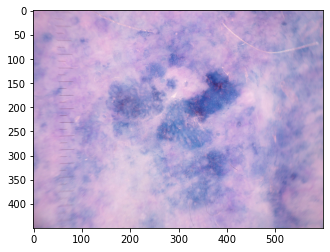

In [67]:
a = cv.imread(os.path.join(file_path1, 'ISIC_0027419.jpg'))
b = cv.imread(os.path.join(file_path1, 'ISIC_0025030.jpg'))
plt.imshow(a)
a.shape

array([[[191, 147, 188],
        [189, 148, 186],
        [191, 150, 187],
        ...,
        [171, 155, 196],
        [170, 156, 197],
        [168, 157, 197]],

       [[193, 149, 186],
        [194, 152, 187],
        [191, 153, 189],
        ...,
        [169, 156, 194],
        [169, 159, 195],
        [168, 159, 192]],

       [[192, 148, 185],
        [195, 152, 189],
        [196, 153, 190],
        ...,
        [169, 155, 196],
        [171, 157, 198],
        [169, 156, 194]],

       ...,

       [[155, 124, 157],
        [154, 121, 156],
        [154, 124, 159],
        ...,
        [161, 146, 177],
        [159, 144, 176],
        [155, 141, 175]],

       [[151, 122, 155],
        [154, 123, 156],
        [152, 123, 156],
        ...,
        [163, 147, 178],
        [159, 144, 175],
        [159, 142, 175]],

       [[151, 119, 154],
        [149, 120, 153],
        [152, 121, 154],
        ...,
        [167, 147, 176],
        [161, 147, 175],
        [155, 143, 173]]

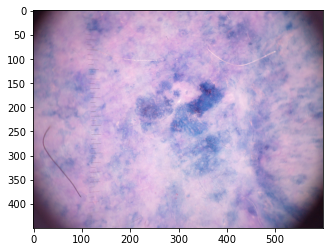

In [66]:
plt.imshow(b)